## Model for only 3 cars
- **1** Start with a road length of 10 spaces and 3 cars, which should be randomly distributed. Run this model for at least 20 complete steps. Consider the following:
• For each step, calculate and store the average speed (0.0 − 1.0) across all the cars
i.e. how many cars move in each step based on the total number of cars. Print out a single average for this calculated speed across all steps. How does this value align with your expectations?

- **2** For the initial model created, the ratio of cars to length of road was 0.3 (3 cars / road length of 10). From your model, how does the average speed change based on this ratio? Consider how to best present this relationship. As an example you could consider:
• The highest ratio possible to give an average speed greater than 0.9 (i.e. a car moves almost every step).
• What overall trend is present, if any.

In [121]:
import numpy as np
from numpy import random
seed = 7
space = 10
cars = 3
iteration = 20
rng = random.default_rng(seed)
road = np.zeros(space)
a_speed = np.zeros(iteration)
a_speed_cb = np.zeros(iteration)
# Create a list of numbers from 1 to 10
numbers = list(range(1, space + 1))

# Randomly select 3 unique numbers from the list
position = rng.choice(numbers, cars, replace = False)


for i in range(cars):
    road[position[i] - 1] = 1

print(road)



[0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]


In [122]:
def three_cars(x):
    flag = 0
    y = x.copy()
    for i in range(len(x)):
        if(i == len(x) - 1):
            if(y[i] == 1):
                if(y[0] == 0):
                    x[i] = 0
                    x[0] = 1
                    flag += 1
        else:
            if(y[i] == 1):
                if(y[i + 1] == 0):
                    x[i] = 0
                    x[i + 1] = 1
                    flag += 1
    return x, flag

In [123]:

for i in range(iteration):
    n_step, n_move = three_cars(road)
    speed = n_move / 10
    
    a_speed[i] = speed
print(a_speed)

[0.1 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3]


## Model for 2 cars and 1 bus
- **1** Start with a road length of 10 spaces with 2 cars and 1 bus, which should be randomly distributed. Run this model for at least 20 complete steps. Consider the following:
• As before, calculate and store the average speed (0.0 − 1.0) but now update this to include all vehicles i.e. how many vehicles move in each step based on the total number of vehicles. Again print out a single average for the speed across all steps. Has this changed from the previous value?

In [125]:
import numpy as np
from numpy import random
seed = 3
space = 10
cars = 2
bus = 1
iteration = 20
rng = random.default_rng(seed)
road_cb = np.zeros(space)
a_speed_cb = np.zeros(iteration)
# Create a list of numbers from 1 to 10
numbers = list(range(1, space + 1))

# Randomly select 3 unique numbers from the list
position_total = rng.choice(numbers, 3, replace = False)
position_bus = rng.choice(position_total, 1)

road_cb[position_bus[0] - 1] = 2
for i in range(3):
    if (road_cb[position_total[i] - 1] == 0):
        road_cb[position_total[i] - 1] = 1

print(road_cb)        


[1. 1. 0. 0. 0. 0. 2. 0. 0. 0.]


In [126]:
def two_cars_one_bus(x):
    flag = 0
    y = x.copy()
    for i in range(space):
        if (y[i] == 2):
            if(i == space - 2):
                if(y[space - 1] == 0 and y[0] == 0):
                    x[i] = 0
                    x[i + 1] = 2
                    flag += 1
            elif(i == space - 1):
                if(y[0] == 0 and y[1] == 0):
                    x[i] = 0
                    x[0] = 2
                    flag += 1
            else:
                if(y[i + 1] == 0 and y[i + 2] == 0):
                    x[i] = 0
                    x[i + 1] = 2
                    flag += 1

        if (y[i] == 1):
            if(i == space - 1):
                if(y[i] == 1):
                    if(y[0] == 0):
                        x[i] = 0
                        x[0] = 1
                        flag += 1
            else:
                if(y[i] == 1):
                    if(y[i + 1] == 0):
                        x[i] = 0
                        x[i + 1] = 1
                        flag += 1
    return x, flag
                    
            

In [91]:
#two_cars_one_bus(road_cb)

(array([0., 0., 2., 0., 0., 1., 0., 0., 0., 1.]), 2)

In [127]:
for i in range(iteration):
    n_step, n_move = two_cars_one_bus(road_cb)
    speed = n_move / 10
    
    a_speed_cb[i] = speed
print(a_speed_cb)

[0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3]


## For 500 passengers 100 spaces
- **5** For a fixed number of passengers, investigate the average vehicle speed for varying ratios of cars to buses. Include only the minimum number of vehicles needed to transport the total number of people.
- Total number of passengers: 500
- Number of passengers per car: 5
- Number of passengers per bus: 30
- Road length of at least 100 spaces


## Most 16 buses, 4 cars
- Case 1

In [150]:
import numpy as np
from numpy import random
seed = 7
space = 100
cars_4 = 4
bus_16 = 16
iteration_4_16 = 50
rng = random.default_rng(seed)
road_4_16 = np.zeros(space)
a_speed_4_16 = np.zeros(iteration)
# Create a list of numbers from 1 to 100
numbers = list(range(1, space + 1))

# Randomly select 20 unique numbers from the list
position_total = rng.choice(numbers, 20, replace = False )
position_bus = rng.choice(position_total, 16, replace = False)

for i in range(bus):
    road_4_16[position_bus[i] - 1] = 2
for i in range(bus + cars):
    if (road_4_16[position_total[i] - 1] == 0):
        road_4_16[position_total[i] - 1] = 1      
print(position_total)
print(position_bus)
print(road_4_16)

[28 77 52 57 48 20 98  5 47 26 79 85 12  1 76 81 50 73 67 13]
[73 85 76  1 13 48 81 52 98 47 77 79 26 28 50 67]
[2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
 0. 2. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 2. 0. 2. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0.]


In [151]:
for i in range(iteration_4_16):
    n_step, n_move = two_cars_one_bus(road_4_16)
    speed = n_move / (bus_16 + cars_4)
    
    a_speed_4_16[i] = speed
print(a_speed_4_16)

[0.6  0.75 0.85 0.85 0.95 0.95 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


In [152]:
import matplotlib.pyplot as plt

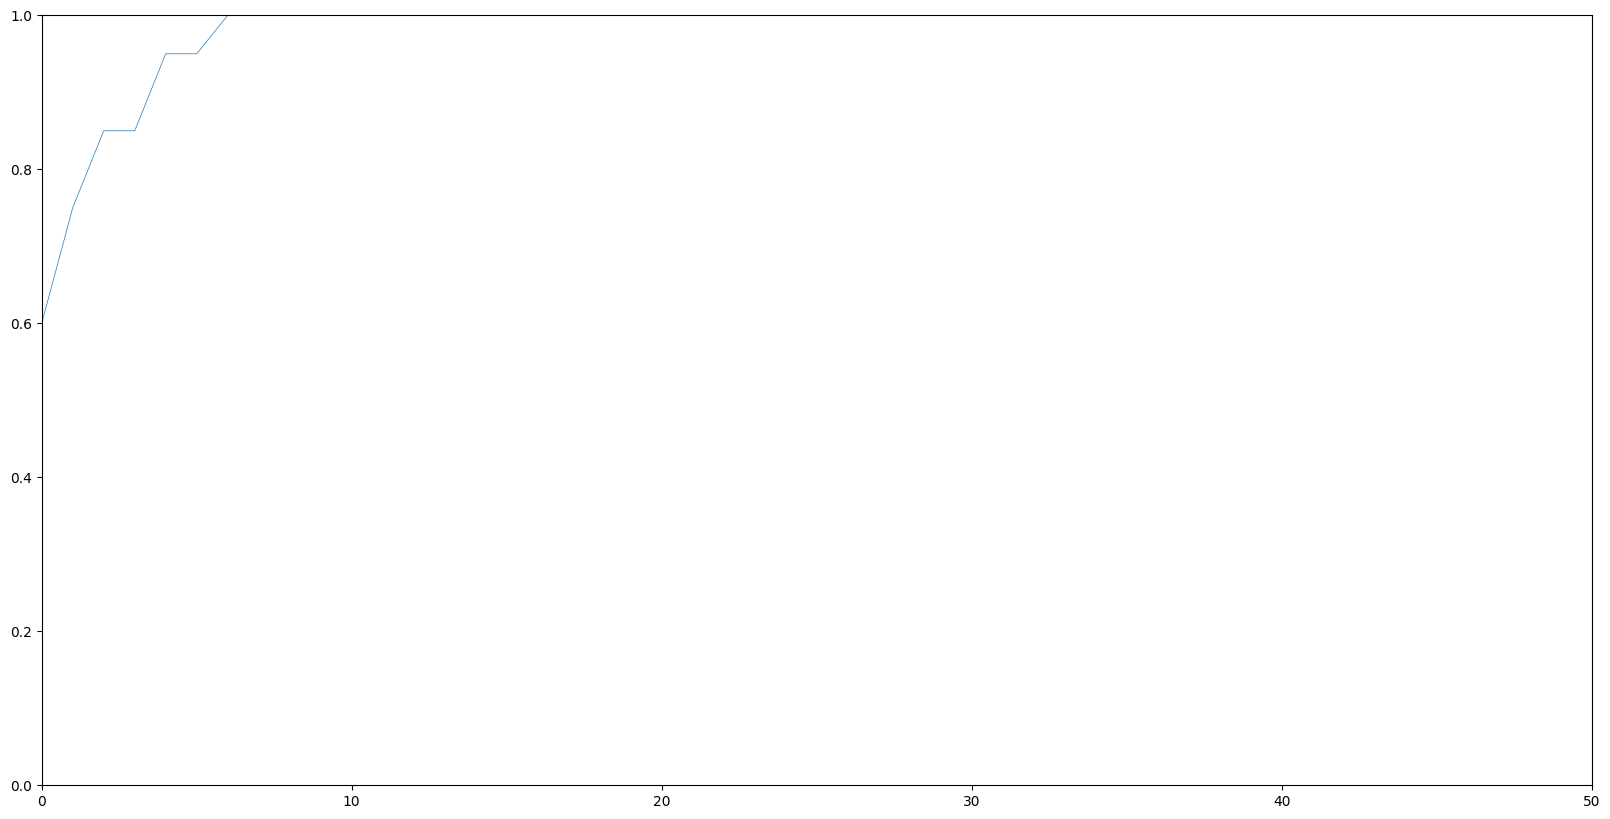

In [153]:
plt.figure(figsize=(20,10))
plt.ylim(0,1)
plt.xlim(0,iteration_4_16)
plt.plot(a_speed_4_16, linewidth=0.5)
plt.show()

## More case
- No.cars increase
- No.buses decrease to 0

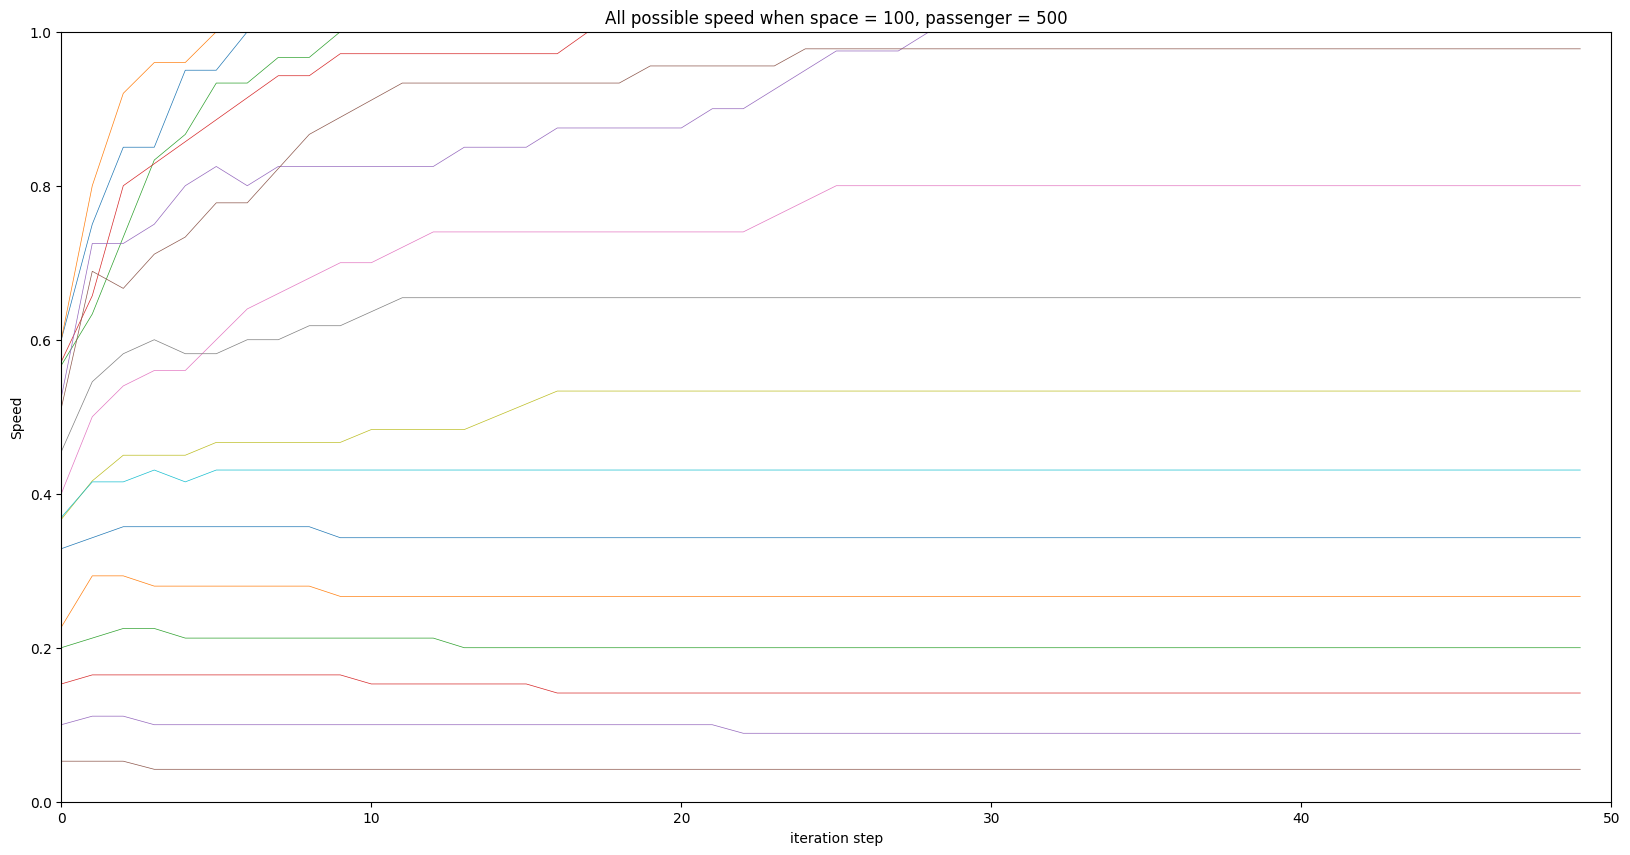

In [149]:
space = 100
plt.figure(figsize=(20,10))
plt.ylim(0,1)
plt.xlim(0,iteration_total)
plt.xlabel('iteration step')
plt.ylabel('Speed')
plt.title('All possible speed when space = 100, passenger = 500')
for i in range(16):
    cars_in = 4 + i * 6
    bus_de = 16 - i
    iteration_total = 50
    rng = random.default_rng(seed)
    road_total = np.zeros(space)
    a_speed_total = np.zeros(iteration)
    # Create a list of numbers from 1 to 100
    numbers = list(range(1, space + 1))
    
    # Randomly select 20 unique numbers from the list
    position_total = rng.choice(numbers, (cars_in + bus_de) , replace = False )
    position_bus = rng.choice(position_total, bus_de , replace = False)
    
    for i in range(bus_de):
        road_total[position_bus[i] - 1] = 2
    for i in range(bus_de + cars_in):
        if (road_total[position_total[i] - 1] == 0):
            road_total[position_total[i] - 1] = 1   
    
    for i in range(iteration_total):
        n_step, n_move = two_cars_one_bus(road_total)
        speed = n_move / (bus_de + cars_in)
        
        a_speed_total[i] = speed
    plt.plot(a_speed_total, linewidth=0.5)
plt.show()